# Titanic example

This notebook illustrate a toy example, with three passengers, and uses a squared distance classifier, inspired by Machine Learning with Quantum Computers by Schuld and Petruccione, to predict if a passenger will survive the 2021 Titanic disaster.

Two of the three passengers are the training set.  One survived and one died. The aim is to predict the fate of the third passenger in the mini-test set.  

Data is given for all three passengers consisting of a cabin number, assumed to be between 1 and 2,500, and a ticket price, assumed to be between £1 and £10,000, stored in a vector $\bf{x_m}$ for the training data, and $\bf{x}$ for the test data.  A nearest neighbour classifier is used to classify the third passenger, with $$p(y=1|\bf{x}) = \frac{1}{\chi} \frac{1}{M_1} \sum_{m|y^m = 1}\left( 1 - \frac{1}{c}\|\bf{x} - \bf{x^m} \|^2\right)$$

where $M_1$ is the sum over all training inputs labeled with $y_m$ = 1, $c$ is an arbitary constant, and $\chi$ is a normalisation factor to ensure $p(y = 0|\bf{x}) + p(y = 1|\bf{x}) = 1$

Import modules needed:

In [1]:
from pathlib import Path
import numpy as np
import math

HOME_DIR = '..'
BASE_DIR = Path(HOME_DIR)

import sys
sys.path.append(HOME_DIR)

from config.config import DATA
PROJECT = '01_titanic'
FOLDER = 'processed'
FILE = 'processed_data.csv'

from src.modules.data_helper_functions import (read_csv, 
                                              find_gamma_m, 
                                              normalise,
                                              )

from src.modules.graph_functions import plot_simple_scatter

Load the data

In [2]:
file_path = BASE_DIR.joinpath(DATA).joinpath(PROJECT).joinpath(FOLDER).joinpath(FILE)
print(f'Data will be loaded from {file_path}')
data = read_csv(file_path)
print(f'The raw data is:')
for items in data:
    print(items)

Data will be loaded from ..\data\01_titanic\processed\processed_data.csv
The raw data is:
{'passenger': 'Passenger1', 'raw_price': '8500', 'raw_cabin': '910', 'price': '0.85', 'cabin': '0.364', 'survived': '1'}
{'passenger': 'Passenger2', 'raw_price': '1200', 'raw_cabin': '2105', 'price': '0.12', 'cabin': '0.842', 'survived': '0'}
{'passenger': 'Passenger3', 'raw_price': '7800', 'raw_cabin': '1121', 'price': '0.78', 'cabin': '0.4484', 'survived': ''}


Clean and print the data:

In [3]:

labels, x1, x2, y = [], [], [], []

for row in data:
    labels.append(row['passenger'])
    x1.append(float(row['price']))
    x2.append(float(row['cabin']))
    y_val = (row['survived'])
    if y_val:
        y.append(int(y_val))
    else:
        y.append(y_val)

print(f'labels = {labels}')
print(f'x1 = {x1}')
print(f'x2 = {x2}')
print(f'y - classification result {y}')

labels = ['Passenger1', 'Passenger2', 'Passenger3']
x1 = [0.85, 0.12, 0.78]
x2 = [0.364, 0.842, 0.4484]
y - classification result [1, 0, '']


Plot data

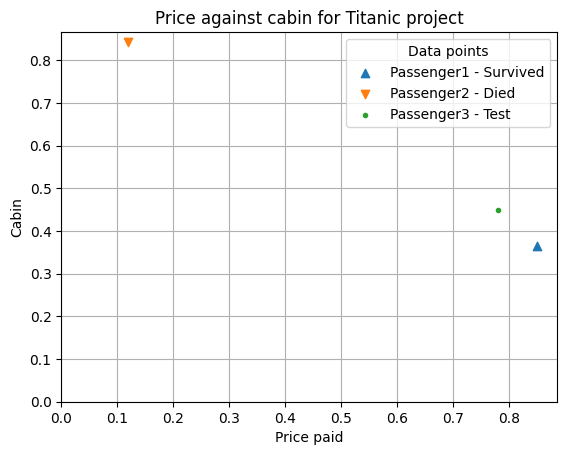

In [4]:
plot_simple_scatter(x1, x2, labels, y)

Calculate the square distance classifier:

First find the test data:

In [5]:
for i, items in enumerate(y):
    if items == '':
        x = np.array([x1[i],x2[i]])
if x.shape != (2,):
    raise Exception(f'x,shape should be (2,), is {x.shape}')
print(f'The test point is {x}')

The test point is [0.78   0.4484]


Calculate $p(y = 0|\bf{x})$ and $p(y = 1|\bf{x})$, and print results

In [6]:
M0, M1, p0, p1 = 0, 0, 0, 0
for i, item in enumerate(y):
    x_m = np.array([x1[i],x2[i]])
    if item == 1:
        M1 += 1
        p1 += find_gamma_m(x, x_m)
        print(f'For point {x_m} gamma_m with a passenger who survived at point {x} is {p1:.3f}.')
    elif item == 0:
        M0 += 1
        p0 += find_gamma_m(x, x_m)
        print(f'For point {x_m} gamma_m with a passenger who died at point {x} is {p0:.3f}.')
    elif item != '':
        raise Exception('Value of y is {item} which is not allowed') 
    
p0, p1 = p0/M0, p1/M1 # find average value
#normalise
chi = p0 + p1
p0, p1 = p0/chi, p1/chi

print(f'The probability that the test passenger dies is {p0:.1%}.')
print(f'The probability that the test passenger survives is {p1:.1%}.')

if p1 > p0:
    print('The classifier predicts survival!')
else:
    print('The classifier predicts death!')

For point [0.85  0.364] gamma_m with a passenger who survived at point [0.78   0.4484] is 0.988.
For point [0.12  0.842] gamma_m with a passenger who died at point [0.78   0.4484] is 0.409.
The probability that the test passenger dies is 29.3%.
The probability that the test passenger survives is 70.7%.
The classifier predicts survival!


In [7]:
x1, x2 = normalise(x1, x2)

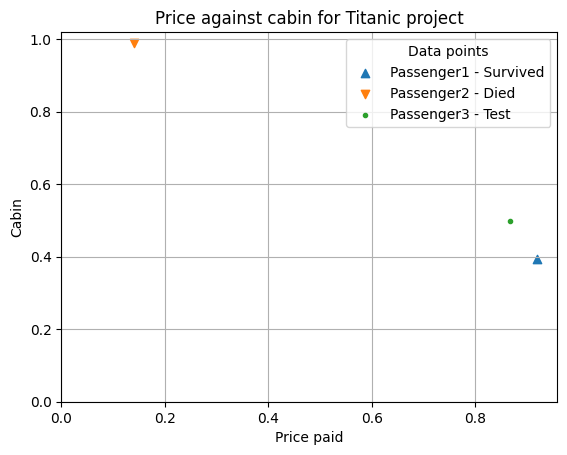

In [9]:
#print(x1, x2)
plot_simple_scatter(x1, x2, labels, y)